In [14]:
# examples/Python/Basic/kdtree.py

import numpy as np
import open3d as o3d


print("Testing kdtree in open3d ...")
print("Load a point cloud and paint it gray.")
# pcd = o3d.io.read_point_cloud("../../TestData/Feature/cloud_bin_0.pcd")
pcd.paint_uniform_color([0.5, 0.5, 0.5])
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

print("Paint the 1500th point red.")
pcd.colors[1500] = [1, 0, 0]

print("Find its 200 nearest neighbors, paint blue.")
[k, idx, _] = pcd_tree.search_knn_vector_3d(pcd.points[1500], 200)
np.asarray(pcd.colors)[idx[1:], :] = [0, 0, 1]

print("Find its neighbors with distance less than 0.2, paint green.")
[k, idx, _] = pcd_tree.search_radius_vector_3d(pcd.points[1500], 0.2)
np.asarray(pcd.colors)[idx[1:], :] = [0, 1, 0]

print("Visualize the point cloud.")
o3d.visualization.draw_geometries([pcd])
print("")

Testing kdtree in open3d ...
Load a point cloud and paint it gray.
Paint the 1500th point red.
Find its 200 nearest neighbors, paint blue.
Find its neighbors with distance less than 0.2, paint green.
Visualize the point cloud.


RuntimeError: [1;31m[Open3D ERROR] GLFW Error: X11: The DISPLAY environment variable is missing[0;m

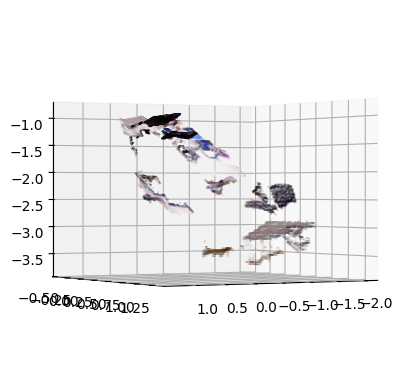

In [103]:
points = np.asarray(pcd.points)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#colors = (np.asarray(pcd.colors)*255).astype(np.uint8)
ax.scatter3D(points[:,0],points[:,1],points[:,2],s=0.001,c=colors_valid/255)
ax.view_init(elev=0, azim=60)
plt.show()


In [70]:
colors = np.array(color_raw).reshape(-1,3)

In [77]:
depths = np.array(depth_raw).reshape(-1)

In [78]:
indices = depths>0

In [79]:
colors_valid = colors[indices]

In [81]:
colors_valid.shape

(229875, 3)

In [ ]:
#Build KDTree from point cloud
print("Testing kdtree in open3d ...")
    print("Load a point cloud and paint it gray.")
    pcd = o3d.io.read_point_cloud("../../TestData/Feature/cloud_bin_0.pcd")
    pcd.paint_uniform_color([0.5, 0.5, 0.5])
    pcd_tree = o3d.geometry.KDTreeFlann(pcd)

In [ ]:
#find neighboring points
 print("Paint the 1500th point red.")
    pcd.colors[1500] = [1, 0, 0]

In [ ]:
#Using search_knn_vector_3d
print("Find its 200 nearest neighbors, paint blue.")
    [k, idx, _] = pcd_tree.search_knn_vector_3d(pcd.points[1500], 200)
    np.asarray(pcd.colors)[idx[1:], :] = [0, 0, 1]

In [ ]:
#Using search_radius_vector_3d
print("Find its neighbors with distance less than 0.2, paint green.")
    [k, idx, _] = pcd_tree.search_radius_vector_3d(pcd.points[1500], 0.2)
    np.asarray(pcd.colors)[idx[1:], :] = [0, 1, 0]

In [97]:
#or similarily
print("Visualize the point cloud.")
o3d.visualization.draw_geometries([pcd])
print("")

Visualize the point cloud.


RuntimeError: [1;31m[Open3D ERROR] GLFW Error: X11: The DISPLAY environment variable is missing[0;m

In [58]:
rgbd_image.PointCloud

Type.PointCloud

Read TUM dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


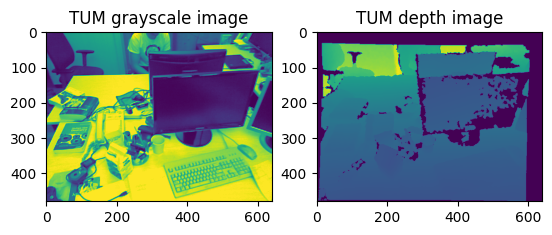

geometry::PointCloud with 229875 points.

In [10]:
	

# examples/Python/Basic/rgbd_tum.py

import open3d as o3d
import matplotlib.pyplot as plt


print("Read TUM dataset")
color_raw = o3d.io.read_image(
    "/home/ubuntu//E2PN/rgbd_dataset_freiburg1_xyz/rgb/1305031102.175304.png")
depth_raw = o3d.io.read_image(
    "/home/ubuntu//E2PN/rgbd_dataset_freiburg1_xyz/depth/1305031102.160407.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_tum_format(
    color_raw, depth_raw)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('TUM grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_image.depth)
plt.show()
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.c2298amera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down

pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
#o3d.visualization.draw_geometries([pcd])


In [13]:
from mpl_toolkits import mplot3d


AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter3'

In [8]:
plt.imread("/home/ubuntu/E2PN/rgbd_dataset_freiburg1_xyz/rgb/1305031102.175304.png")

array([[[0.5372549 , 0.4862745 , 0.49411765],
        [0.5372549 , 0.49803922, 0.49411765],
        [0.53333336, 0.49803922, 0.5058824 ],
        ...,
        [0.08627451, 0.08235294, 0.09411765],
        [0.07058824, 0.07450981, 0.10196079],
        [0.05490196, 0.06666667, 0.10196079]],

       [[0.52156866, 0.5019608 , 0.49411765],
        [0.52156866, 0.5176471 , 0.49411765],
        [0.48235294, 0.49019608, 0.49803922],
        ...,
        [0.08627451, 0.08627451, 0.09411765],
        [0.08235294, 0.07450981, 0.10196079],
        [0.07450981, 0.0627451 , 0.10196079]],

       [[0.50980395, 0.50980395, 0.5058824 ],
        [0.50980395, 0.45490196, 0.47058824],
        [0.43529412, 0.44705883, 0.43529412],
        ...,
        [0.09019608, 0.07843138, 0.10588235],
        [0.09411765, 0.07450981, 0.08627451],
        [0.09803922, 0.07843138, 0.08627451]],

       ...,

       [[0.20784314, 0.16470589, 0.20784314],
        [0.20784314, 0.16470589, 0.2       ],
        [0.19607843, 0

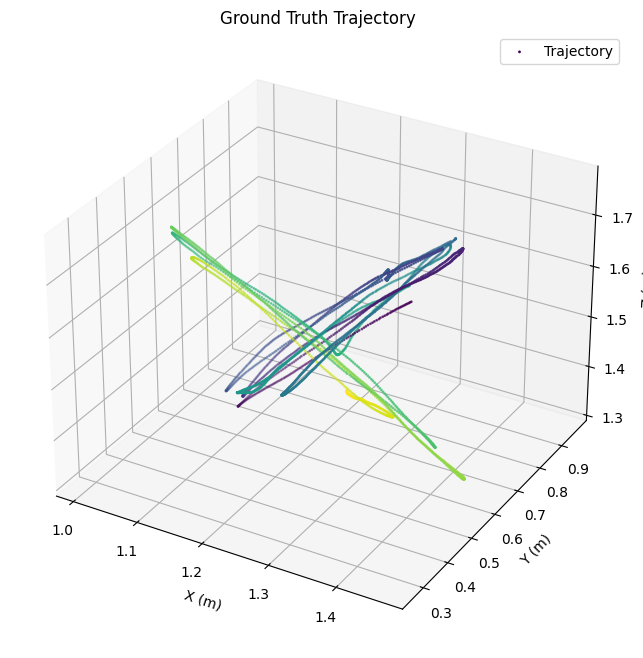

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
file_path = '/home/ubuntu/E2PN/rgbd_dataset_freiburg1_xyz/groundtruth.txt'
data = np.genfromtxt(file_path, skip_header=3)  

translations = data[:, 1:4]  # Extract columns 1 to 3 (tx, ty, tz)
colors = np.arange(len(translations))
# Plot the trajectory in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory
ax.scatter3D(translations[:, 0], translations[:, 1], translations[:, 2], label='Trajectory', c=colors, s=1)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Ground Truth Trajectory')
ax.legend()